In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()


In [15]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 10000 test images.

The images are of size 32*32 with three channels(R,G,B) 

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

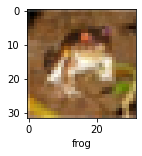

In [11]:
plot_sample(X_train, y_train, 0)

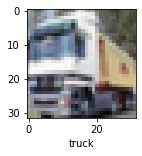

In [12]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build simple artificial neural network for image classification

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 83s 50ms/step - loss: 1.8141 - accuracy: 0.3515
Epoch 2/5
1563/1563 [==============================] - 76s 48ms/step - loss: 1.6259 - accuracy: 0.4251
Epoch 3/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.5427 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.4823 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 82s 53ms/step - loss: 1.4309 - accuracy: 0.4980


You can see that at the end of 5 epochs, accuracy is at around 49%

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.58      0.54      1000
           1       0.69      0.52      0.59      1000
           2       0.33      0.44      0.38      1000
           3       0.39      0.28      0.33      1000
           4       0.50      0.28      0.36      1000
           5       0.51      0.23      0.31      1000
           6       0.37      0.78      0.51      1000
           7       0.66      0.43      0.52      1000
           8       0.53      0.70      0.60      1000
           9       0.56      0.54      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



# Now let us build a convolutional neural network to train our images

In [27]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [28]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4597 - accuracy: 0.4758
Epoch 2/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1035 - accuracy: 0.6136
Epoch 3/15
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9688 - accuracy: 0.6612
Epoch 4/15
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8771 - accuracy: 0.6971
Epoch 5/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8062 - accuracy: 0.7208
Epoch 6/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7484 - accuracy: 0.7392
Epoch 7/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6980 - accuracy: 0.7595
Epoch 8/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6517 - accuracy: 0.7745
Epoch 9/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6092 - accuracy: 0.7895
Epoch 10/15
1563/1563 [==============================] - 33s 21m

With CNN, at the end 5 epochs, accuracy was at around 73% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. 


In [30]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0755 - accuracy: 0.6931


[1.0754555463790894, 0.6930999755859375]

In [31]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.75837777e-05, 1.70582047e-04, 5.48178505e-04, 9.77493048e-01,
        1.85467343e-05, 2.15425547e-02, 1.08158580e-04, 1.02003150e-06,
        9.35300995e-05, 6.73843897e-06],
       [1.63399440e-04, 2.27557102e-04, 2.95408960e-08, 8.24466806e-09,
        1.09895565e-11, 2.93809282e-11, 2.56697961e-11, 6.13455554e-12,
        9.99608934e-01, 1.73633580e-07],
       [8.30775220e-03, 6.34740591e-02, 6.66540800e-05, 3.25863657e-04,
        2.91159031e-05, 4.58947725e-05, 4.28049098e-05, 2.51552883e-05,
        9.25545156e-01, 2.13764887e-03],
       [2.17595965e-01, 1.66995020e-03, 2.19738707e-02, 6.00653409e-04,
        5.11193357e-04, 1.08500099e-05, 1.18105920e-04, 2.18980975e-04,
        7.56535649e-01, 7.64759083e-04],
       [1.25371537e-06, 2.63129959e-06, 2.02924609e-02, 2.10826676e-02,
        4.53025699e-01, 3.27218440e-03, 5.02322674e-01, 9.20507688e-08,
        2.95097237e-07, 3.66641864e-08]], dtype=float32)

y_pred contains the probability of a testing example being a specific class.

we can use argmax on ech example of y_pred to get the index of maximum value of each example, as each index corresponds to each class, we can use this to get the final class.


In [32]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

#y_classes contain the predicted class of each testing example. 

[3, 8, 8, 8, 6]

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

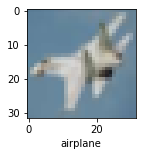

In [42]:
#eg:-

plot_sample(X_test, y_test,10)


10th example of testing data is an image of an airplane.

Let's see if our model predicts it correctly

In [43]:
classes[y_classes[10]]

'airplane'

as we can see, our cnn model predicted it correctly

In [45]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72      1000
           1       0.88      0.77      0.82      1000
           2       0.64      0.55      0.59      1000
           3       0.45      0.54      0.49      1000
           4       0.63      0.67      0.65      1000
           5       0.53      0.67      0.59      1000
           6       0.81      0.73      0.77      1000
           7       0.76      0.72      0.74      1000
           8       0.85      0.77      0.81      1000
           9       0.84      0.75      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000

